# Programming for Data Analysis

## Project
<br/>

#### Lecturer: Brian McGinley

#### Student: Damien Connolly

#### Student number: G00340321
<br/>

**************************************************************************************************************************

#### Introduction
**TEXT**

Homeless persons in Ireland

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Magic command to ensure that plots render inline [https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline]
%matplotlib inline

In [3]:
# Set seaborn style
# Use darkplot plot style for contrast
sns.set_style("darkgrid")
# Set the default colour palette
sns.set_palette("colorblind")

In [4]:
# Create empty dataframe
df = pd.DataFrame()

#### Gender

Total - 4,969

Male - 2,980
Female - 1,989

In [8]:
# Seed Reset: Set the random seed so the numbers will stay the same each time the cell is executed
np.random.seed(1234) 

# Define the gender variables

choice = ["Male", "Female"]

# the random.choice function lets us distribute the data to match the real world data 

gender = np.random.choice(choice, 4969, p=[0.5997, 0.4003])


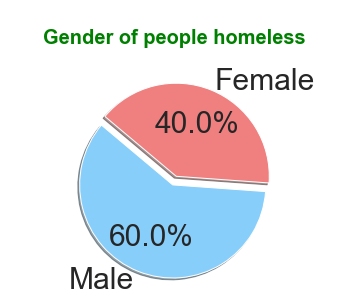

In [9]:
# Adapted from: https://pythonspot.com/matplotlib-pie-chart/ 

# Data to plot
labels = 'Male', 'Female'
slices_gender = [0.5997, 0.4003]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(slices_gender, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 30})
plt.title("\nGender of people homeless\n", fontweight="bold", fontsize="20", color="g")

plt.axis('equal')
plt.show()

In [10]:
df = pd.DataFrame(data={"Gender": gender})
df

,Gender
0,Male
1,Female
2,Male
3,Female
4,Female
...,...
4964,Male
4965,Male
4966,Female
4967,Male


#### Age Group

Total average age - 30 (30.5)

Male - 33 (33.2)

Female - 27 (26.8)



In [33]:
# View age data
agefile = pd.read_csv("HomelessAge.csv")
agefile.describe()

,Male,Female
count,16.000000,16.000000
mean,251.125000,180.500000
std,129.780777,128.913408
min,30.000000,13.000000
25%,154.250000,61.500000
50%,288.000000,172.000000
75%,361.000000,279.000000
max,436.000000,386.000000


In [34]:
agefile

,Age-group,Male,Female
0,0-4,379,386
1,5-9,292,273
2,10-14,190,174
3,15-19,165,170
4,20-24,286,335
5,25-29,355,375
6,30-34,381,297
7,35-39,436,263
8,40-44,384,198
9,45-49,348,151


In [35]:
af = agefile.drop([0,1,2,13,14,15])
af

,Age-group,Male,Female
3,15-19,165,170
4,20-24,286,335
5,25-29,355,375
6,30-34,381,297
7,35-39,436,263
8,40-44,384,198
9,45-49,348,151
10,50-54,290,86
11,55-59,213,66
12,60-64,122,48


Text(0.5, 1.0, 'Distribution of Ages')

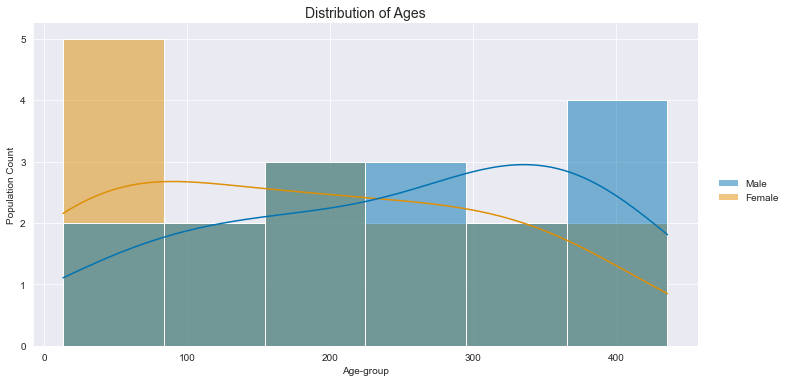

In [41]:
sns.displot(data=agefile, kde="line", aspect = 2) # Use aspect to make plot wider
plt.xlabel('Age-group')
plt.ylabel('Population Count')
plt.title('Distribution of Ages', fontsize=14)

piece of information that I need is the mode of the data. The mode will simply be the age where the total population value is highest (in the imported data), so I can extract this from the DataFrame.

In [11]:
m = stats.mode("Male")
print(m)

ModeResult(mode=array(['Male'], dtype='<U4'), count=array([1]))


In [15]:
# Seed Reset: Set the random seed so the numbers will stay the same each time the cell is executed
np.random.seed(1234) 

# Age variable created based on gender and course type
cnt = 0
for idx, val in enumerate(df.itertuples()):
    if df.Gender[idx] == "Male":
            df.loc[idx, 'Age'] = round(np.random.triangular(15, 37.5, 64)) 
    elif df.Gender[idx] == "Female":
            df.loc[idx, 'Age'] = round(np.random.triangular(15, 27.5, 64)) 

In [16]:
# View age data
#agefile = pd.read_csv("HomelessAge.csv")
df.describe()

,Age
count,4969.000000
mean,37.708593
std,9.296295
min,15.000000
25%,31.000000
50%,38.000000
75%,43.000000
max,64.000000


In [28]:
df.Age.describe()

count    4969.000000
mean       37.708593
std         9.296295
min        15.000000
25%        31.000000
50%        38.000000
75%        43.000000
max        64.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Distribution of Ages')

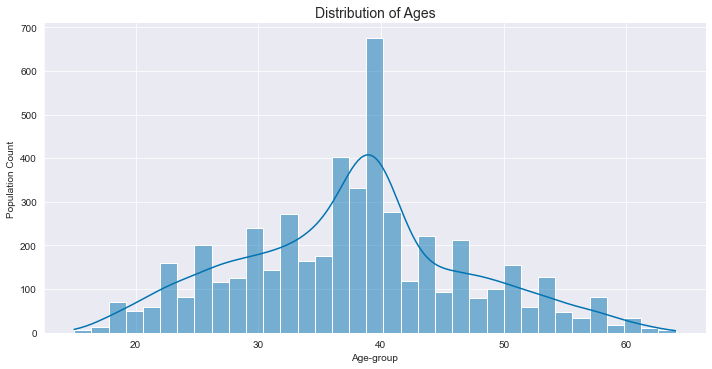

In [40]:
sns.displot(kde="line", data=df.Age, aspect = 2) # Use aspect to make plot wider
plt.xlabel('Age-group')
plt.ylabel('Population Count')
plt.title('Distribution of Ages', fontsize=14)

In [45]:
df

,Gender,Age
0,Male,30.0
1,Female,38.0
2,Male,37.0
3,Female,44.0
4,Female,44.0
...,...,...
4964,Male,31.0
4965,Male,36.0
4966,Female,50.0
4967,Male,36.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


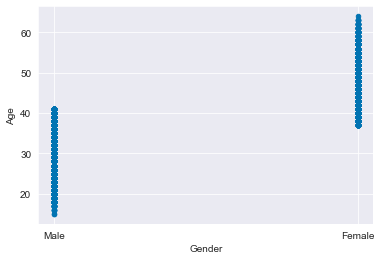

In [61]:
df.plot(x ='Gender',y = 'Age', kind = 'scatter')

#### Location








In [14]:
ls = pd.read_csv("location.stats.csv")
ls

,Region,Male,Female,Total
0,Dublin,2802,2207,5009
1,South West,285,186,471
2,Mid West,265,131,396
3,South East,203,120,323
4,Mid East,163,68,231
5,West,119,70,189
6,North East,100,53,153
7,Midland,50,44,94
8,North West,31,9,40
9,Total,4018,2888,6906


Dublin = 72.53%

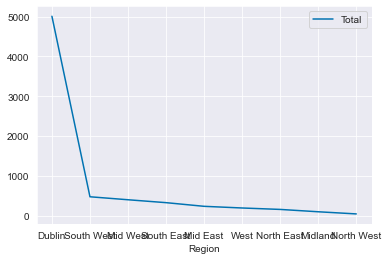

In [71]:
locStat = ls.drop([9])
locStat.plot(x='Region', y='Total', kind = 'line')

In [73]:
location = ['Dublin', 'South West', 'Mid West', 'South East', 'Mid East', 'West', 'North East', 'Midlands', 'North West']
np.random.choice(location, 4969, p=[0.7253, 0.0682, 0.0573, 0.0467, 0.0334, 0.0273, 0.0221, 0.0136, 0.0057]
df = pd.DataFrame(location = ['Location'])

SyntaxError: invalid syntax (<ipython-input-73-0e730641588b>, line 3)